In [2]:
# some import we will use in this notebook at various places
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns

# Daten: Vorverarbeiten, Transformieren & Extrahieren
## Daten für einen Lernalgorithmus vorbereiten

Lernalgorithmen haben eine strikte mathematische Formulierung, an dessen Erwartung wir unsere Daten anpassen müssen.  
Das Wichtigste dabei ist, die oft gemischten Datentypen unseres Datensatzes in eine Zahlenrepräsentation zu überführen, damit der Lernalgorithmus mit ihnen rechnen kann.  
Das ist aber noch nicht alles - Es kann sein, dass die Zufallsvariablen in unserem Datensatz ("Features", Spalten) nicht genügend Information enhalten um unsere Frage genügend genau zu beantworten (Voraussage der Zielvariable). In diesem Fall müssen wir versuchen, zusätzliche "Features" zu berechnen z.b. durch Wissen der Domänenexperten (Operateure/Ingenieure, welche mit dem physikalischen Prozess vertraut sind) oder durch einige bekannte "Best-Practices" welche eine hohe Chance haben, das Prädiktionsergebnis zu verbessern.  

Auch kann es aber sein, dass wir eine Vielzahl von Variablen haben, von denen einige kaum oder gar nicht Relevant für unsere Fragestellung sind - In diesem Fall wollen wir die Anzahl von Variablen reduzieren, welche als Eingabe für den Algorithmus ausgewählt wird, da jede zusätzliche Dimension einen immensen Einfluss auf die Laufzeit des Algorithmus haben.  

In der Praxis tritt oft eine Kombination aus beiden Fällen auf: Man generiert Features, welche gewisse Anforderungen erfüllen (z.B. Prädiktions-Latenz gering halten -> zeitliche Features nur begrenzt einsetzbar) und wählt danach aus allen vorhanden Features die minimale Menge aus, welche die Laufzeit oder Genauigkeitsanwendungen erfüllen.

In [3]:
from sklearn import preprocessing

# 1. Skalieren und Transformieren

### 1.1 Kategorische Features

Oft liegen Daten in einem kategorischen Format vor. Dies koennen z.B. ganzzahlige Werte sein, welche keine bestimmte Ordnung haben. Auf der anderen Seite koennen Werte, welche eine Ordnung beinhalten z.B. verschiedene Product-Tiers sein, welche die Nutzer von Ihrem Produkt gekauft haben.  
Sehr haeufig kommt es vor, dass solche kategorischen Werte aber als Strings vorliegen Beispiele dafuer sind Browser-Identifier, Lokalisierungs-Strings ["en_US", "en_GB", ..].  
In sklearn.preprocessing gibt es dafuer unter anderem den [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) und den [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler). Fuer weitere Anwendungen sehen Sie bitte in der [Dokumentation von sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) nach.

> **Merke:** Ob die Features Explizit transformiert werden muessen, haengt auch von der verwendeten Bibliothek und Teilweise auch des Modells ab. Um sicherzugehen, welche Schritte von Ihrem Modell erwartet werden, lesen sie *immer* die spezifische Dokumentation!

### 1.2 Skalierung aller Features

Die Skalierung von Features ist ein wichtiger Vorverarbeitungsschritt um die annahmen der verschiedenen Lernalgorithmen nicht zu verletzen. Es gibt eine vielzahl von Anwendungsfaellen, im folgenden werden drei der wichtigsten Skalierungsverfahren genauer erklaert.  
Eine Uebersicht ueber in sklearn verfuegbare Verfahren finden Sie in der unter 1.1 genannten Dokumentation.

**Standard-Score oder ZScore**  
Viele der ML Algorithmen machen bestimmte Annahmen bezueglich der Verteilung der Daten. Das fuehrt dazu, dass diese bessere Ergebnisse erzielen, wenn die Daten (egal ob normalverteilt oder nicht) um den Mittelwert zentriert sind, und die Varianz normiert ist. Das klingt erstmal unintuitiv, hat seine Rechtfertigung aber im [zentralen Grenzwertsatz](https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz). Ausserdem gibt es einen Zusammenhang zwischen Varianz und Informationsgehalt, sind die einzelnen Varianzen zwischen den Features zu ungleich, kann die Performanz des Modells abnehmen, wenn einem Feature faelschlicherweise implizit eine hoehere Wichtigkeit eingerechnet wird.  
Daten auf unterschiedlichen Skalen koennen ausserdem die Konvergenz des Gradient-Descent Algorithmus verlangsamen.

Da diese Art der Datenvorbereitung so weitverbeitet ist, gibt es in den Bibliotheken auch Funktionen dafuer. In sklearn.preprocessing gibt es den [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [6]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = preprocessing.StandardScaler()
print(scaler.fit(data))
print(f'Mean of Features:\n{scaler.mean_}')
print(f'Transformed Features\n{scaler.transform(data)}')
print(f'Transform applied to new Data [2,2]:\n{scaler.transform([[2, 2]])}')


StandardScaler()
Mean of Features:
[0.5 0.5]
Transformed Features
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
Transform applied to new Data [2,2]:
[[3. 3.]]


Diese Art der Skalierung ist meist ein sehr guter Ansatz. Es gibt zwar noch weitere Ansaetze fuer die Skalierung, aber diese sind eher in bestimmten Nischen anzuwenden. Zwei wichtige Ausnahmen sollen im folgenden noch beschrieben werden, da in realen Datensaetzen ebenfalls auftauchen. ZScore hat allerdings einige Schwachstellen:  
Zum Einen, wenn die Daten sehr von Aussenseiter-Werten (Outlier) betroffen sind. Diese haben naemlich einen grossen Einfluss auf statistische Kennzahlen wie den Mittelwert.  
Zum Anderen, wenn die Prozesse nicht stationaer sind, also wenn sich die statistischen Kennzahlen im Laufe der Zeit aendern. Dort macht es natuerlich auch keinen Sinn, um einen Mittelwert zu zentrieren - dieser aendert sich ja staendig!

**Verunreinigung mit Outlier-Daten**  
In realen Datensaetzen kommt es oft vor, dass diese mit Outlier-Werten behaftet sind.  
Da oft nicht klar ist, ob so ein Outlier durch eine Fehleingabe, einen fehlerhaften Sensor 
oder durch ein wirklich abnormales Ereignis entstanden ist, ist es nicht immer ratsam, 
diese aus den Daten zu entfernen. Kommen sehr viele dieser Outlier in einem Datensatz vor, wirkt sich das deutlich
auf die statistischen Kennzahlen aus. Der Mittelwert etwa ist *kein* statistisch robustes Mass und wird stark verfaelscht.  
Stattdessen sollte man eine Skalierung verwenden, welche z.B. auf dem Median basiert (dieser ist robust). In sklearn.preprocessing gibt es dafuer den [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler). Einen Vergleich zwischen verschiedenen Verfahren aus sklearn finden sie [hier](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

3.9.6 (default, Aug 09 2021, 11:37:16) [GCC]
Mean without outliers:	0.626
Median without outliers	0.525
Mean with outliers	1.467
Median with outliers	0.515


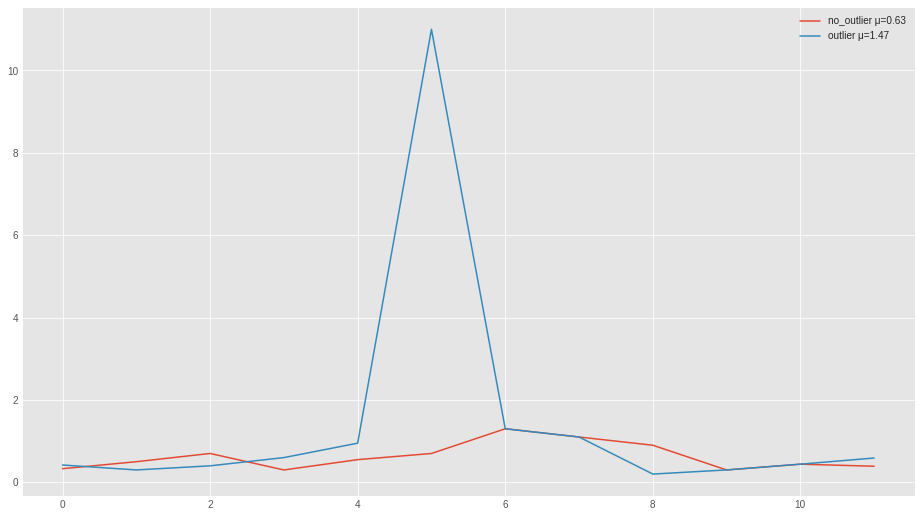

In [88]:
import statistics
import sys

print(sys.version)
no_outlier = [0.33, 0.5, 0.7, 0.3, 0.55, 0.7, 1.3, 1.1, 0.9, 0.3, 0.44, 0.39]
outlier = [0.42, 0.3, 0.4, 0.6, 0.95, 11, 1.3, 1.1, 0.2, 0.3, 0.44, 0.59]
print(f'Mean without outliers:\t{statistics.mean(no_outlier):0.3f}\n' 
        f'Median without outliers\t{statistics.median(no_outlier)}\n' 
        f'Mean with outliers\t{statistics.mean(outlier):0.3f}\n' 
        f'Median with outliers\t{statistics.median(outlier)}')
plt.plot(no_outlier, label=f'no_outlier μ={statistics.mean(no_outlier):0.2f}')
plt.plot(outlier, label=f'outlier μ={statistics.mean(outlier):0.2f}')
plt.legend(loc='best')

**Nicht-Stationaere Prozesse**  
Daten, welche nicht-stationaere Prozesse beschreiben (also solche, die ueber einen langen Zeitraum ihre Verteilung aendern z.b. Aktien), muessen gesondert behandelt werden. Bei Ihnen ist man meist am relativen Verlauf interessiert.  Eine einfache Methode, solche Daten sinnvoll zu Bewerten ist, indem man sie logarithmisch skaliert. Dadurch werden alle Werte exponentiell "naeher zusammegezogen".

Mean first quarter: 1.4945527139132104
Mean last quarter: 2.481318777013251


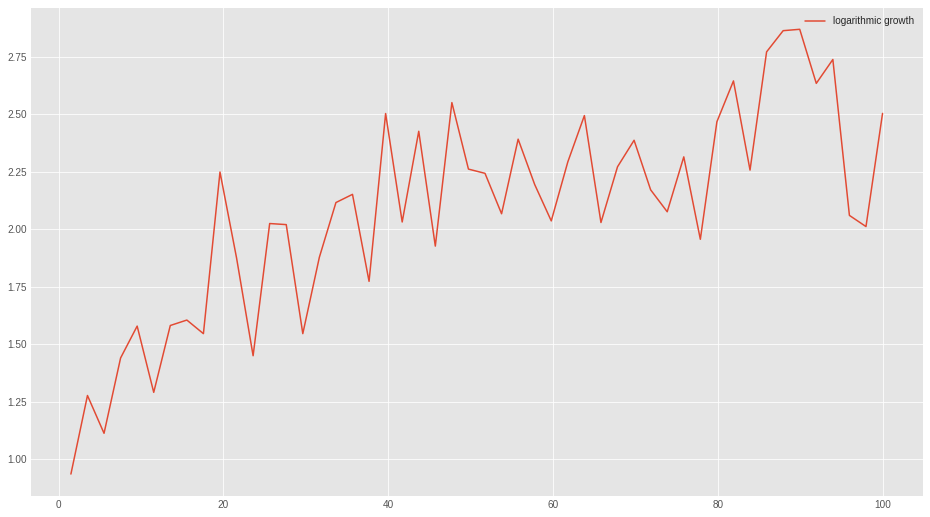

In [101]:
x = np.linspace(1.5, 100, num=50)
y = np.log10(x) 
y = [i+np.random.random_sample() for i in y]
plt.plot(x, y, label='logarithmic growth')
plt.legend(loc='best')

print(f'Mean first quarter: {statistics.mean(y[:12])}')
print(f'Mean last quarter: {statistics.mean(y[-12:])}')

## 2. Erstellen von neuen Features (Feature Extraction/Engineering)

Manchmal kann es vorkommen, dass die vorliegenden Daten schlicht nicht in der Lage sind, unsere Frage zu beantworten (oder nur unzureichend). Um uns das Problem zu veranschaulichen, betrachten wir erst einmal ein lineares Modell, welches unsere Daten mit einer Hyperebene trennt (im 2-Dimensionalen Fall also eine Linie).  

Alle moeglichen Entscheidungsgrenzen sind also jeweils eine bestimmte Linie mit beliebiger Steigung und Achsenschnittpunkt. Nun versuchen wir, mit dieser Klasse von Linien als Entscheidungsgrenze, Funktionen aus der boolschen Algebra abzubilden.

**Motivation: XOR-Funktion lernen**

| x1 	| x2 	| x1 XOR x2     |
|----	|----	|---	|
| 0  	| 0  	| 0 	|
| 0  	| 1  	| 1 	|
| 1  	| 0  	| 1 	|
| 1  	| 1  	| 0 	|

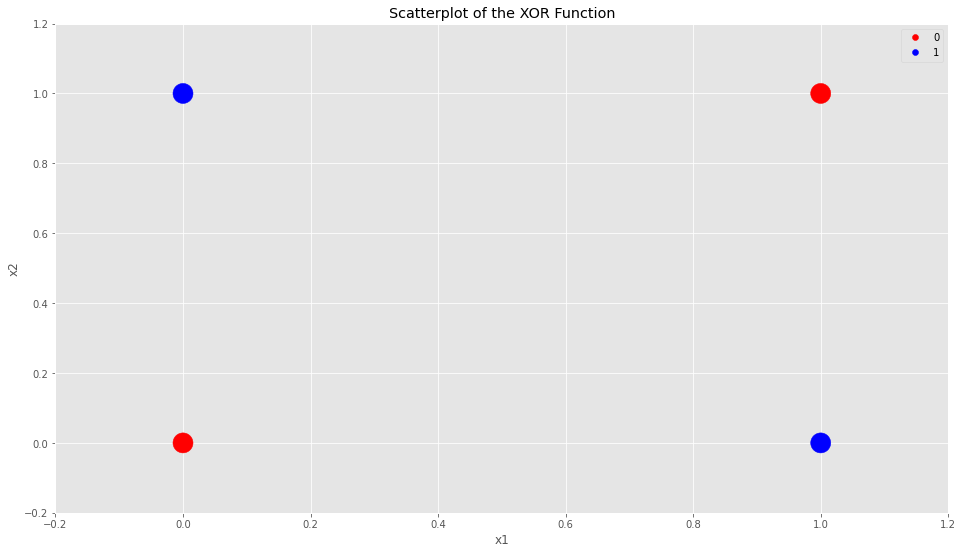

In [45]:
from matplotlib.colors import ListedColormap
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y  = [0, 1, 1, 0]
clrmap = ['r' if i == 0 else 'b' for i in y]
classes = [0, 1]
colors = ListedColormap(['r','b'])
# dies ist uebrigens ein grober nachteil von matplotlib: 
# selbst simple features wie einfaerben sind teilweise recht aufwendig (colormaps gehen nur mit floats)
# abstraktere bibliotheken wie seaborn / ggplot bieten dort einfachere APIs
sct = plt.scatter(x1, x2, c=y, cmap=colors, s=400)
plt.xlabel('x1')
plt.xlim(-0.2, 1.2)
plt.ylabel('x2')
plt.ylim(-0.2, 1.2)
plt.title('Scatterplot of the XOR Function')
plt.legend(handles=sct.legend_elements()[0], labels=classes)

Es ist offensichtlich nicht moeglich, diese Anordnung von Punkten fehlerfrei zu teilen. Egal wie wir die Linie einzeichnen, wir wuerden immer einen Fehler erzeugen.  

**Aufgabe**  

Nehmen wir jetzt an, unsere Labels waeren nicht {0,1} sondern {-1, 1}. Koennen wir die Punkte linear separieren, wenn wir ein neues Feature $x_3$ einfuehren?

### 2.1 Statistische Kennzahlen

Wenn man mehrere gleichartige Features pro Datenpunkt hat, kann man diese zu einer einzigen Zahl zusammenfuehren, indem man statistische Kennzahlen wie Mittelwert oder die Standardabweichung/Varianz dieser Berechnet.  

Ein gaengiges Beispiel sind Pixel in einem Bild: Eigentlich ist jedes einzelne Pixel ein eigenes Feature und jedes Bild ein Datenpunkt. Man kann jedoch z.B. Pixel einer bestimmten Region auswerten, indem man ueber ein Histogramm die Verteilung approximiert.  

Diese Verfahren koennen auch mit anderen Schritten kombiniert werden - etwa einer Frequenztransformation wie Fourier-, kosinus- oder Wavelet-Transformation (man erstellt dann Histogramme von Transformationskoeffizienten).

### 2.2 Zeitverläufe als neuer Datenpunkt

Speziell bei der Zeitreihenanalyse kommt es vor, dass man speziell an den Aenderungen zwischen den Datenpunkten interessiert ist. Hier kann man die Features fuer gewuenschten Zeitraum dann in einem einzigen Datenpunkt Zusammenfassen, entweder als zeitverzoegerte originale Werte (sog. Lag-Features) oder wieder als statistische Kennzahl wie einem laufenden Mittelwert ueber den gewuenschten Zeitraum (sog. Rolling-Windows).  

Dies hat allerdings entscheidende Nachteile:
- Erzeugt mehr Features, sodass der Rechenaufwand steigt.
- Prediction Latency erhöht, da man länger warten muss bis eine Prediction aus mehreren zeitverschobenen Features berechnet werden kann.


## 3. Selektieren von Features

Die einzelnen Variablen in einem Datensatz haben einen unterschiedlich starken Einfluss auf unsere Zielvariable. Nehmen wir einige Beispiele au den letzten Workshops: Je nach Sportart hat die Koerpergroesse eines Athleten eher wenig Einfluss darauf, ob er eine Medaille gewinnt.  Wohingegen die Gattung eines Pinguins schon ziemlich gut allein durch die Schnabelgroesse bestimmt werden kann (seaborn plots).  
Man moechte eine moeglichst gute Vorhersage mit moeglichst wenigen Features, da die Trainingszeit der Modelle mit zusaetzlichen Dimensionen stark ansteigt ([siehe Fluch der Dimensionalitaet](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).  


Grundsaetzlich gibt es zwei Ansaetze Features auszuwaehlen: 

1. **Filter-Ansatz:** Bei diesem Ansatz wird eine Untermenge von Variablen anhand von bestimmten, berechneten Kriterien ausgewaehlt *bevor* ein Modell angepasst wird. Diese Art ist tendenziell schnell durchzufuehren, solange die berechneten Kriterien keinen zu hohen Rechenaufwand haben. Ein Beispiel ist die Selektion mittels [Fisher-Information](https://en.wikipedia.org/wiki/Fisher_information)
2. **Wrapper-Ansatz:** Beim diesem Ansatz wird ein Modell angepasst und mit in die Bewertung der Features eingezogen. Dadurch, dass fuer jede neue Untermenge von Features das Modell neu angepasst werden muss, ist dieses Verfahren sehr aufwaendig. Man fuehrt sozusagen eine Brute-Force Suche ueber einige oder alle Features durch. 

Es kann auch eine Hybridvariante dieser beiden Hauptfaelle zur Anwendung kommen. 

Im folgenden betrachten wir zuerst eine sehr einfache Moeglichkeit fuer Variante 1 (Filtering).


### Kreuzkorrelations-Plot

Eine Methode, die Aehnlichkeit von zwei Variablen zu bemessen, ist der Korrelationskoeffizient nach Pearson. Dieser bemisst die lineare Abhaengigkeit zweier Variablen ueber die Kovarianz der Variablen.  
Die Kovarianz bestimmt die Abhaengigkeit von hohen und niedrigen Werten der Variablen.

$$
\operatorname{Korr}(X,Y)=\frac{\operatorname{Cov}(X,Y)}{\sqrt{\operatorname{Var}(X)}\sqrt{\operatorname{Var}(Y)}}= \frac{\operatorname{E}\left((X-\operatorname{E}(X))(Y-\operatorname{E}(Y))\right)}{\sqrt{\operatorname{E}\left( (X-\operatorname{E}(X))^2\right) \operatorname{E}\left((Y-\operatorname{E}(Y))^2\right)}}
$$

Einfach gesagt wird die Frage beantwortet: Wenn Variable A steigt, wieviel steigt dann im Vergleich Variable B? 
Man kann intuitiv schon erkennen, dass mit dieser Methode prinzipiell eine Auswahl von besser geeigneten Variablen getroffen werden kann. Allerdings koennen auch Variablen mit geringer Korrelation Entscheidend fuer bestimmte Randfaelle sein, besonders bei komplexen Problemstellungen wo hohe Genauigkeiten gefordert sind, verliert diese Methode also prinzipiell an Bedeutung und man muss sich anderer Verfahren bedienen (dazu spaeter mehr). Die Kreuzkorrelation kann allerdings weiterhin eingesetzt werden um zumindest Kandidaten fuer eine weitere Analyse zur Reduktion der Dimensionalitaet vorauszuwaehlen.

Betrachten wir diese Zusammenhaenge einmal anhand eines Beispieldatensatzes aus sklearn. Es gibt einen Datensatz der die Diagnose von Brustkrebs anhand von Mikroskopbildern einer Gewebebiopsie beschreibt.  
Statt direkt auf den Bilddaten zu arbeiten, wurden diese bereits mit einer Reihe von neuen Variablen beschrieben. Es sind also neue Features, die bereits aus den Bilddaten extrahiert wurden (Feature Extraction/Engineering): 

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() # wird als ein dict zurueckgegeben
# ein DataFrame kann ein 
df = pd.DataFrame(data.data, columns = [data.feature_names]) 
#die zielvariable extrahieren wir ebenfalls
df['diagnosis'] = data['target'] 
df.info()

# df = pd.read_csv('../resources/data/breast_cancer.csv', sep=';')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [18]:
print("Unique Diagnoses", str(df.shape[0]), ", ", df.diagnosis.value_counts())
print(data['target_names'])
# achtung! 0 entspricht hier Malignant (Boesartig) und 1 entspricht Benign (Gutartig)
display(df.head(3))

Unique Diagnoses 569 ,  (diagnosis,)
1               357
0               212
dtype: int64
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Wie wir sehen, sind in diesem Datensatz viele geometrische Eigenschaften angefuehrt. Diese basieren alle auf der Form von Zellkernen (z.B. mean radius, concavity, symmetry, etc.) und der Gewebestruktur (z.B. mean texture, fractal dimension, etc.). 

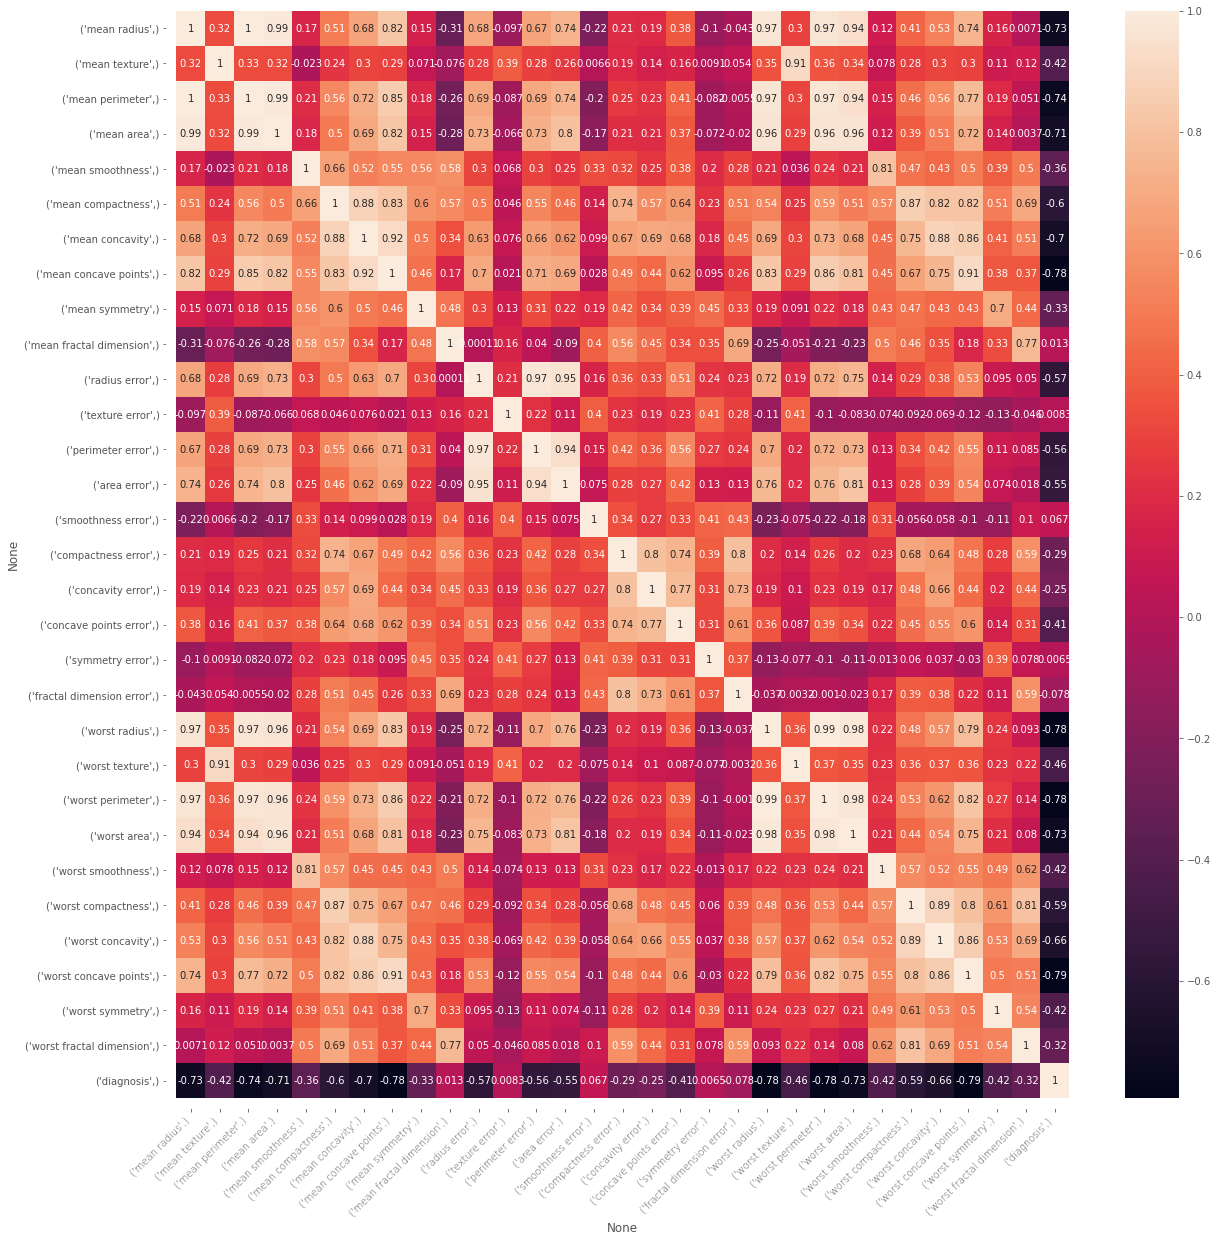

In [7]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
sns.despine(offset=10, trim=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
);